In [32]:
import sqlite3 as sql_client
import pandas as data_analyzer
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
SQL_DB_FILE_PATH='../FPA_FOD_20170508.sqlite'
connection = sql_client.connect(SQL_DB_FILE_PATH)
causes_map = {
  'Miscellaneous': 0,
  'Lightning': 1,
  'Debris Burning': 2,
  'Campfire': 3,
  'Equipment Use': 4,
  'Arson': 5,
  'Children': 6,
  'Railroad': 7,
  'Smoking': 8,
  'Powerline': 9,
  'Structure': 10,
  'Fireworks': 11,
  'Missing/Undefined': 12
}

east_us = ['ME','NH','VT','NY','MA','RI','CT','NJ','PA','DE','MD','DC','MI','OH','IN','IL','WI','WV','VA','NC','TN','KY','SC','GA','AL','MS','FL']
west_us = ['CO','ID','MT','NV','UT','WY','AK','CA','HI','OR','WA']
others = ['AK','AR','AZ','CA','CO','HI','IA','ID','KS','LA','MN','MO','MT','ND','NE','NM','NV','OK','OR','PR','SD','TX','UT','WA','WY']

def getEastResult(q):
    in_query = "('" + "','".join(east_us) + "')"
    return data_analyzer.read_sql(q.format(in_query), con=connection)

def getWestResult(q):
    in_query = "('" + "','".join(west_us) + "')"
    return data_analyzer.read_sql(q.format(in_query), con=connection)

def getOtherResult(q):
    in_query = "('" + "','".join(others) + "')"
    return data_analyzer.read_sql(q.format(in_query), con=connection)

def getAllResult(q):
    res = {}
    res['east'] = getEastResult(q)
    res['west'] = getWestResult(q)
    res['other'] = getOtherResult(q)
    return res


In [33]:
res = getAllResult("""
    SELECT STATE, SUM(FIRE_SIZE) TOTAL
    FROM FIRES 
    WHERE STATE IN {}
    GROUP BY STATE
    ORDER BY TOTAL DESC
""")

<AxesSubplot:title={'center':'Acres Affected - East US'}, xlabel='STATE', ylabel='TOTAL'>

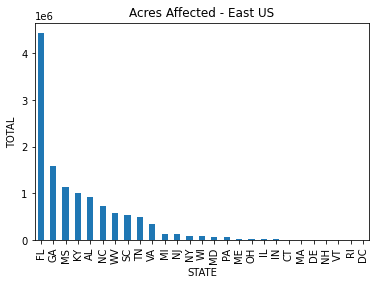

In [37]:
res['east'].set_index('STATE')['TOTAL'].plot(xlabel = 'STATE', ylabel = 'TOTAL', title = 'Acres Affected - East US', kind="bar")

<AxesSubplot:title={'center':'Acres Affected - West US'}, xlabel='STATE', ylabel='TOTAL'>

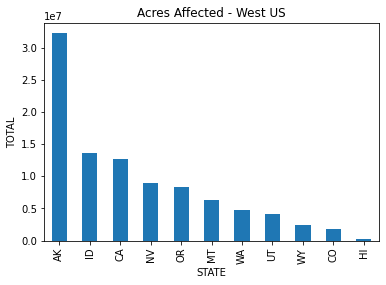

In [38]:
res['west'].set_index('STATE')['TOTAL'].plot(xlabel = 'STATE', ylabel = 'TOTAL', title = 'Acres Affected - West US', kind="bar")

<AxesSubplot:title={'center':'Acres Affected - Other US'}, xlabel='STATE', ylabel='TOTAL'>

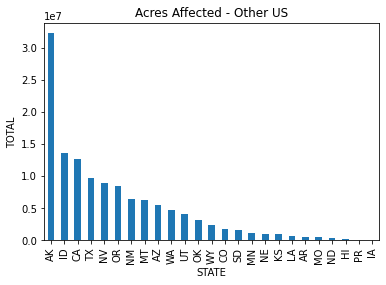

In [39]:
res['other'].set_index('STATE')['TOTAL'].plot(xlabel = 'STATE', ylabel = 'TOTAL', title = 'Acres Affected - Other US', kind="bar")

In [40]:
res = getAllResult("""
    SELECT FIRE_YEAR, COUNT(*) INCIDENT_COUNT
    FROM FIRES 
    WHERE STATE IN {}
    GROUP BY FIRE_YEAR
""")

<AxesSubplot:title={'center':'Frequency - East US'}, xlabel='FIRE_YEAR', ylabel='INCIDENT_COUNT'>

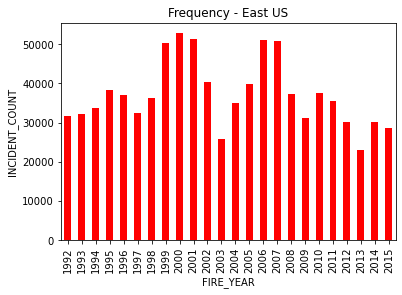

In [42]:
res['east'].set_index('FIRE_YEAR')['INCIDENT_COUNT'].plot(xlabel = 'FIRE_YEAR', ylabel = 'INCIDENT_COUNT', title = 'Frequency - East US', kind="bar", color='red')

<AxesSubplot:title={'center':'Frequency - West US'}, xlabel='FIRE_YEAR', ylabel='INCIDENT_COUNT'>

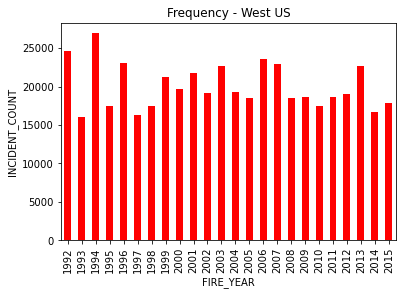

In [43]:
res['west'].set_index('FIRE_YEAR')['INCIDENT_COUNT'].plot(xlabel = 'FIRE_YEAR', ylabel = 'INCIDENT_COUNT', title = 'Frequency - West US', kind="bar", color='red')

<AxesSubplot:title={'center':'Frequency - Other US'}, xlabel='FIRE_YEAR', ylabel='INCIDENT_COUNT'>

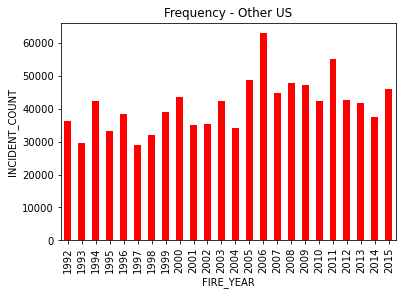

In [44]:
res['other'].set_index('FIRE_YEAR')['INCIDENT_COUNT'].plot(xlabel = 'FIRE_YEAR', ylabel = 'INCIDENT_COUNT', title = 'Frequency - Other US', kind="bar", color='red')

In [45]:
res = getAllResult("""
    SELECT STAT_CAUSE_DESCR CAUSE, COUNT(*) INCIDENT_COUNT
    FROM FIRES 
    WHERE STATE IN {}
    GROUP BY CAUSE
""")

<AxesSubplot:title={'center':'Frequency - East US'}, xlabel='CAUSE', ylabel='INCIDENT_COUNT'>

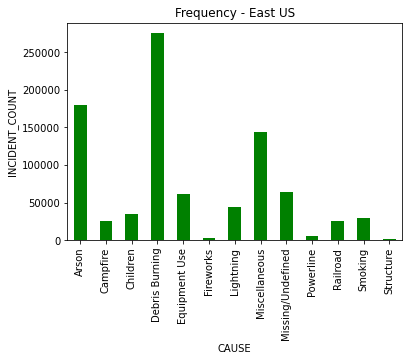

In [46]:
res['east'].set_index('CAUSE')['INCIDENT_COUNT'].plot(xlabel = 'CAUSE', ylabel = 'INCIDENT_COUNT', title = 'Frequency - East US', kind="bar", color='green')

<AxesSubplot:title={'center':'Frequency - West US'}, xlabel='CAUSE', ylabel='INCIDENT_COUNT'>

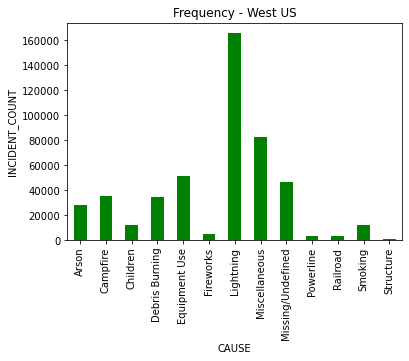

In [47]:
res['west'].set_index('CAUSE')['INCIDENT_COUNT'].plot(xlabel = 'CAUSE', ylabel = 'INCIDENT_COUNT', title = 'Frequency - West US', kind="bar", color='green')

<AxesSubplot:title={'center':'Frequency - Other US'}, xlabel='CAUSE', ylabel='INCIDENT_COUNT'>

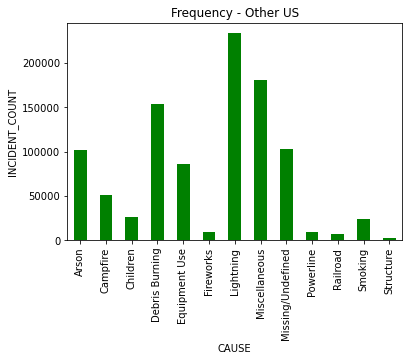

In [48]:
res['other'].set_index('CAUSE')['INCIDENT_COUNT'].plot(xlabel = 'CAUSE', ylabel = 'INCIDENT_COUNT', title = 'Frequency - Other US', kind="bar", color='green')